**Customer Churn**

In [432]:
#Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [433]:
dataset = pd.read_csv("../dataset/dataset.csv")
#we dont require customerID for visualsiation
dataset = dataset.drop(columns='customerID')

In [434]:
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors="coerce")

In [435]:
dataset["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [436]:
#the word automatic are not useful in the analysis
dataset["PaymentMethod"] = dataset["PaymentMethod"].str.replace(" (automatic)", "", regex=False)
dataset["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [437]:
#changing the names of the columns to make them look presentable
dataset = dataset.rename(columns={"SeniorCitizen": "Senior Citizen", 
                                  "tenure": "Tenure", 
                                  "gender": "Gender",
                                  "PhoneService": "Phone Service",
                                  "MultipleLines": "Multiple Lines",
                                  "InternetService": "Internet Service",
                                  "OnlineSecurity": "Online Security",
                                  "OnlineBackup": "Online Backup",
                                  "DeviceProtection": "Device Protection",
                                  "TechSupport": "Tech Support",
                                  "StreamingTV": "Streaming TV",
                                  "StreamingMovies": "Streaming Movies",
                                  "PaperlessBilling": "Paperless Billing",
                                  "PaymentMethod": "Payment Method",
                                  "MonthlyCharges": "Monthly Charges",
                                  "TotalCharges": "Total Charges"})

dataset.dropna(inplace=True)

In [438]:
#after exploring all chart styles we went with the style given by pacoty on github
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')

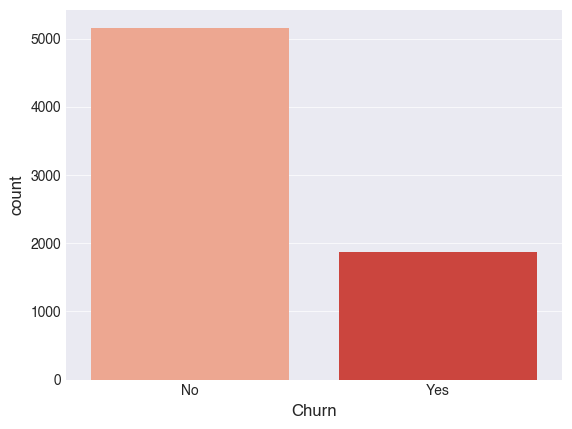

In [439]:
#plotting total churners vs non churners
plt.figure()
plt.text
sns.countplot(x = dataset["Churn"],palette="Reds", hue=dataset["Churn"], legend=False);
#plt.savefig("../Graphs/Churn Count")

In [440]:
#Make a function to plot categorical data according to target
def plot_categorical_to_target(dataset,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = dataset, hue = target)
    return plt.show()

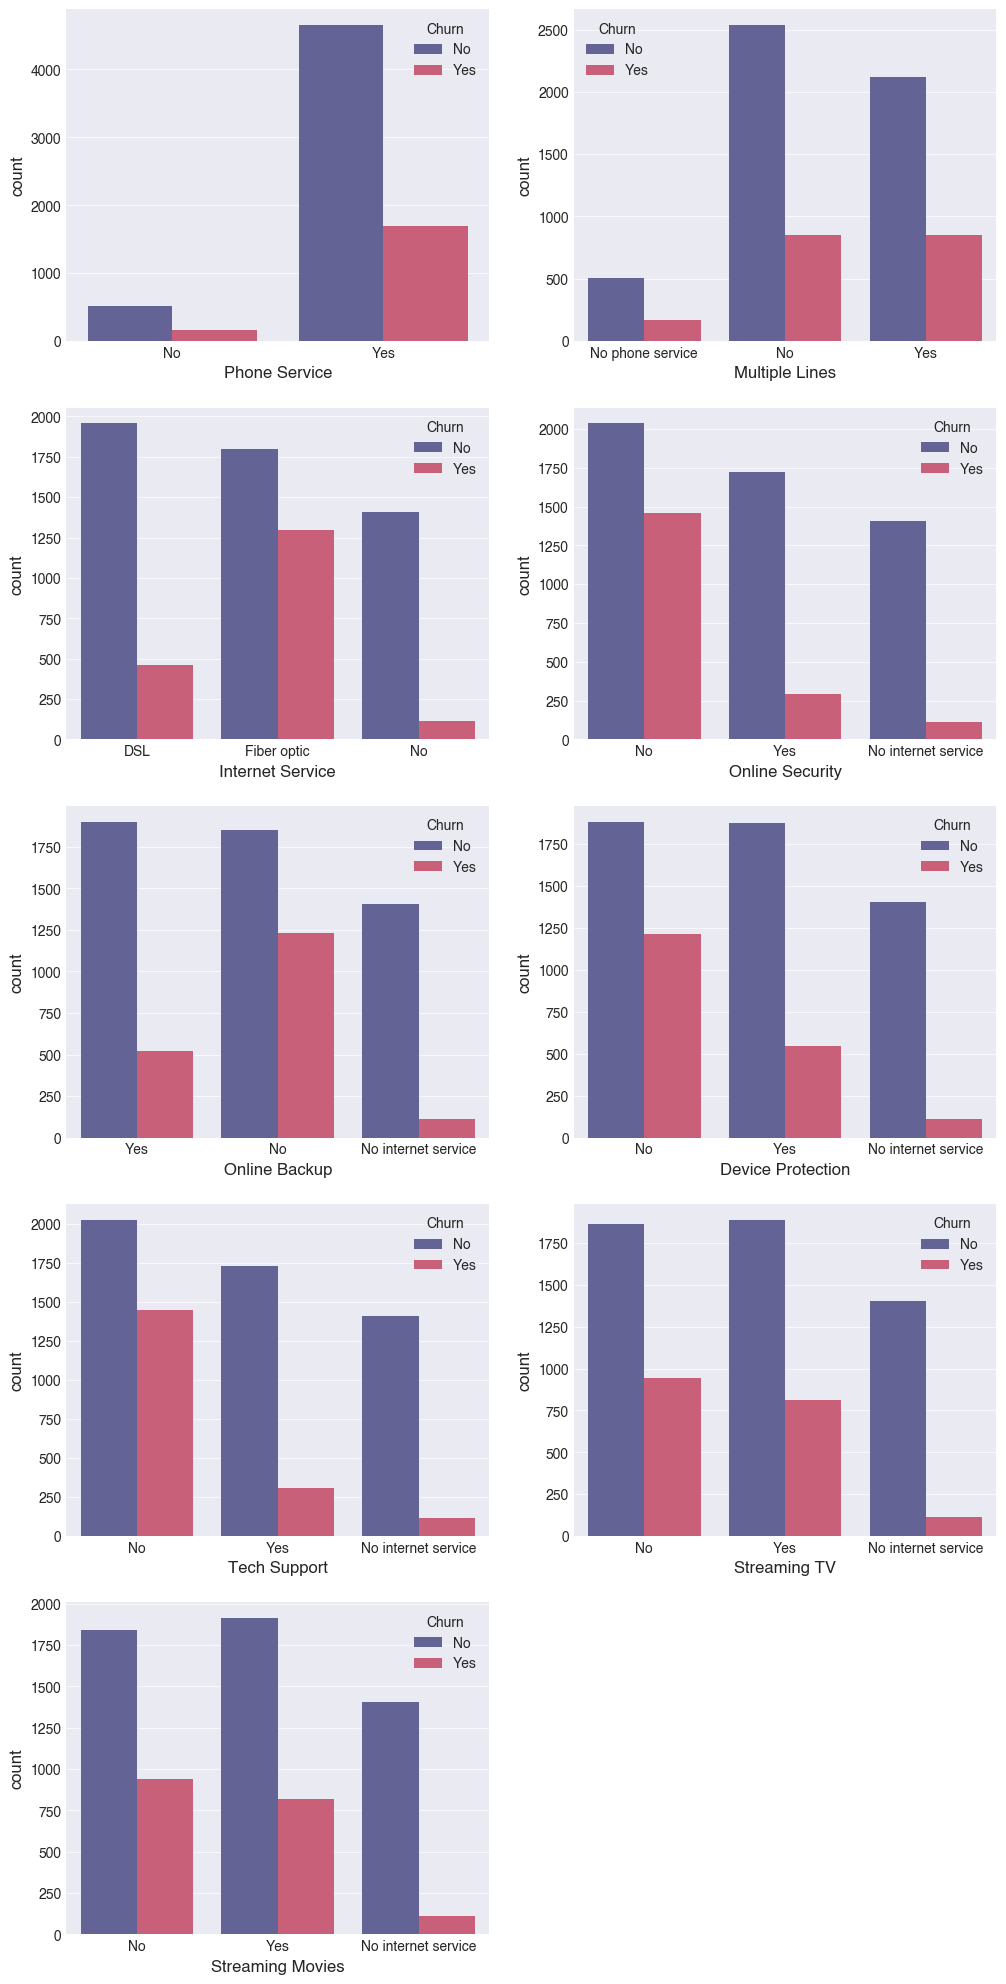

In [446]:
customer_services = ["Phone Service","Multiple Lines","Internet Service","Online Security","Online Backup",
                    "Device Protection","Tech Support","Streaming TV","Streaming Movies"]
#plt.savefig("../Graphs/Customer Service")
plot_categorical_to_target(dataset,customer_services, "Churn");

The moderately higher churn rate for customers who has the phone service.

Customers with internet service fiber optic have a higher churn rate compared with DSL and No.

The much higher churn rate for customers without online security.

Customers who don’t have access to tech support tend to leave more frequently than those who do.

Customers without online backup and device protection have a higher churn rate.

In [447]:
ordinal_map = {
    1: 'Yes',
    0: 'No'
}
dataset['Senior Citizen'] = dataset['Senior Citizen'].map(ordinal_map)

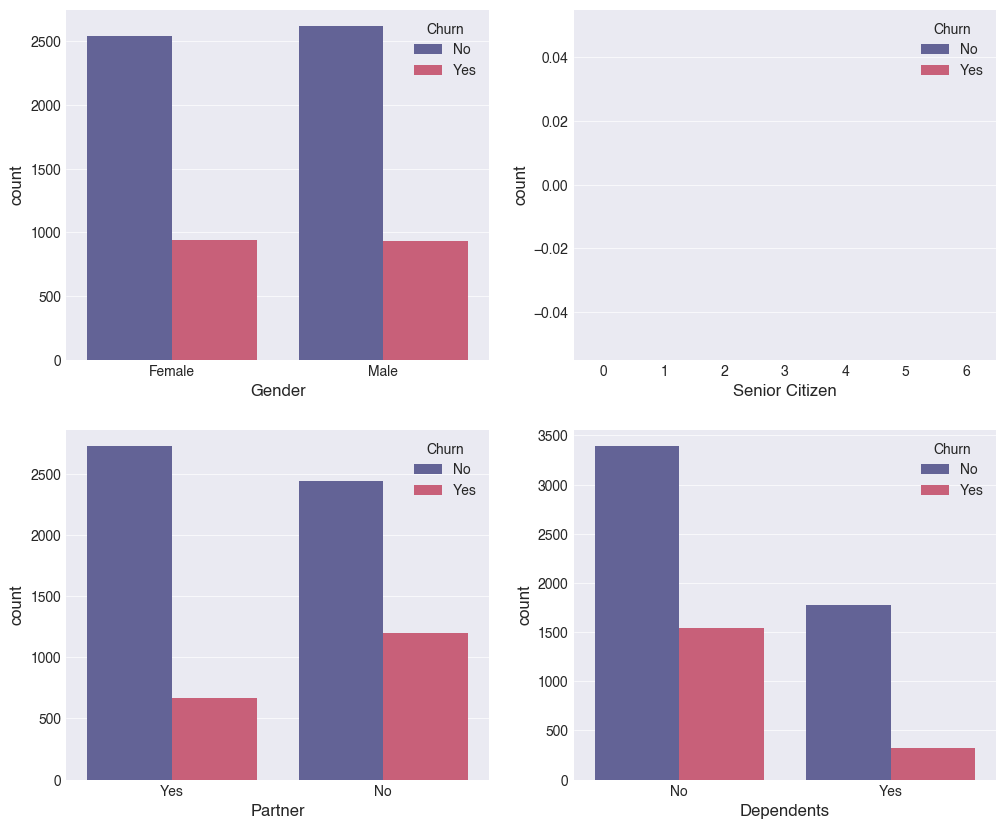

In [449]:
customer_account_cat = ["Gender","Senior Citizen","Partner","Dependents"]
#plt.savefig("../Graphs/Demographic")
plot_categorical_to_target(dataset,customer_account_cat,"Churn")

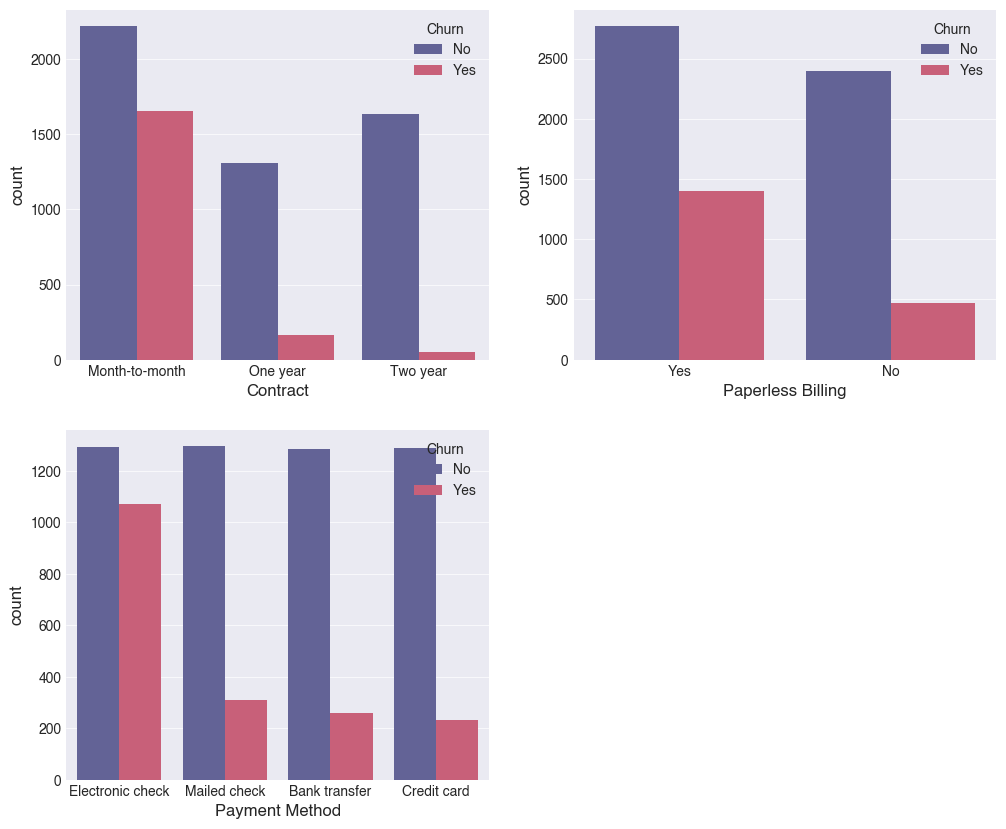

In [ ]:
customer_account_cat = ["Contract","Paperless Billing","Payment Method"]
#plt.savefig("../Graphs/Contract Type")
plot_categorical_to_target(dataset,customer_account_cat,"Churn")

Month to Month Contract Users have a higher chance of churning as compared to One Year or Two Year billings.

Paperless Billing seem to have higher churing rate compared to Traditional Paper bills.

People who pay using Electronic Check have higher churning rate compared to other methods.

In [450]:
def histogram_plots(dataset, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(dataset[column][dataset[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(dataset[column][dataset[target]=="No"], fill = True)
        ax.legend(["Churn","No Churn"], loc='upper right')
    #plt.savefig("../Graphs/Charges")
    return plt.show()

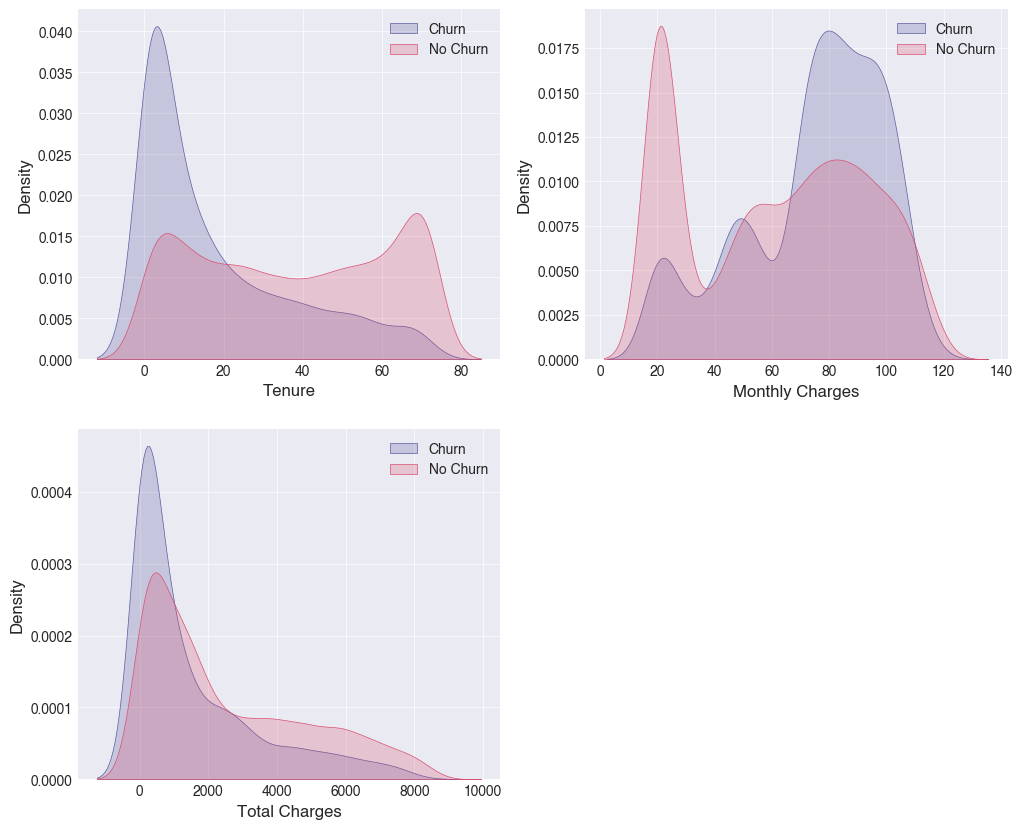

In [451]:
customer_account_num = ["Tenure", "Monthly Charges","Total Charges"]
histogram_plots(dataset,customer_account_num, "Churn")

In [452]:
def outlier_check_boxplot(dataset,numerical_values,Target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = dataset, hue=Target)
    #plt.savefig("../Graphs/Boxplot Charges")
    return plt.show()

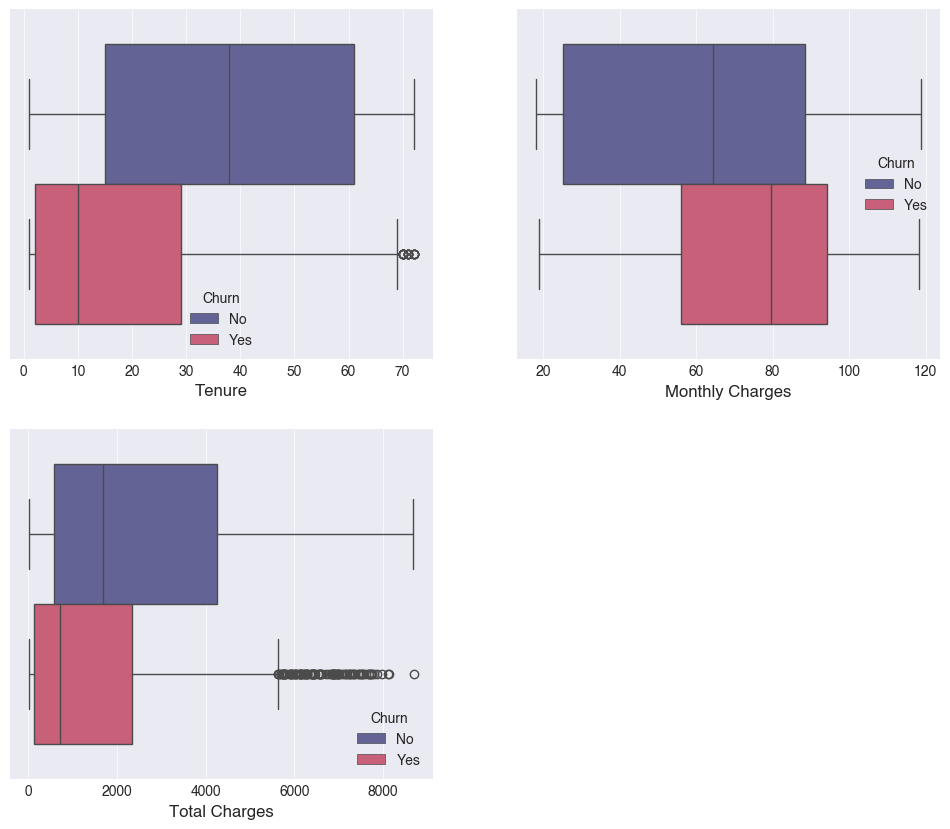

In [453]:
numerical_values = ["Tenure","Monthly Charges","Total Charges"]
outlier_check_boxplot(dataset,numerical_values,"Churn")

In [454]:
dataset.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,NaN,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,NaN,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,NaN,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,NaN,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,NaN,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [455]:
dataset['Multiple Lines'] = dataset['Multiple Lines'].replace(to_replace='No phone service', value='No service')
dataset.loc[:, ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']] = dataset.loc[:, ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']].replace(to_replace='No internet service', value='No service')

In [456]:
categorical_columns_ordinal_1 = [
    'Partner',
    'Dependents',
    'Phone Service',
    'Paperless Billing',
    'Churn'
]
categorical_columns_ordinal_2 = [
    'Multiple Lines',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies'
]

In [457]:
ordinal_map_1 = {
    'Yes': 1,
    'No': 0
}
ordinal_map_2 = {
    'Yes': 1,
    'No': 0,
    'No service': -1
}
ordinal_map_3 = {
    'Fiber optic': 1,
    'DSL': 0,
    'No': -1
}
ordinal_map_4 = {
    'Two year': 2,
    'One year': 1,
    'Month-to-month': 0
}
ordinal_map_5 = {
    'Female': 1,
    'Male': 0
}
ordinal_map_6 = {
    'Electronic check': 1,
    'Mailed check': 0,
    'Bank transfer': 2, 
    'Credit card': 3
}

In [458]:
for col in categorical_columns_ordinal_1:
    dataset[col] = dataset[col].map(ordinal_map_1)

for col in categorical_columns_ordinal_2:
    dataset[col] = dataset[col].map(ordinal_map_2)

dataset['Internet Service'] = dataset['Internet Service'].map(ordinal_map_3)
dataset['Contract'] = dataset['Contract'].map(ordinal_map_4)
dataset['Gender'] = dataset['Gender'].map(ordinal_map_5)
dataset['Payment Method'] = dataset['Payment Method'].map(ordinal_map_6)

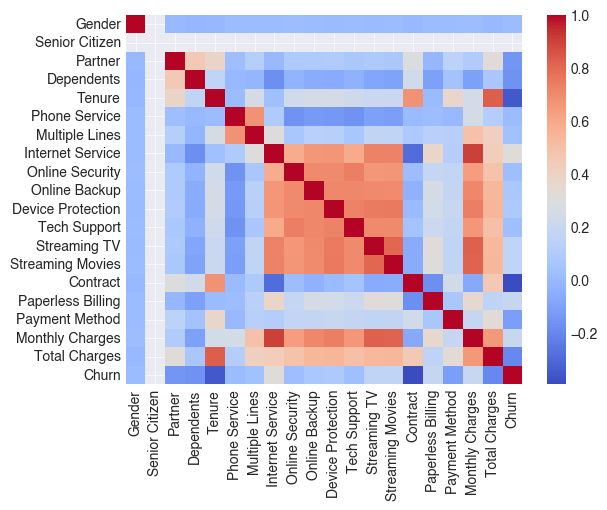

In [461]:
import seaborn as sns
correrlation = dataset.corr()
sns.heatmap(correrlation, cmap='coolwarm');